<a href="https://colab.research.google.com/github/luigitercero/DataScience-TechnicalAssessment/blob/main/DataScience_TechnicalAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

# Cartful Solutions - Technical test - Data Science

### Important

1. write the code for every answer, store the answers as variables and print the variable in the notebook. The process to answer each task, should be in the notebook.
2. Answer the tasks in the order presented.

## 0. Dataset load and context comprehension

### Tasks
* Split dataset into train and test for independent and dependent variables
* Convert independent variables for train and test sets into float numbers
* What is the range of values for the independent variables
* Considering dataset context, why are the independent variables within that range, what do values represent?
* Convert the independent variable values within the range [0,1]
* What is the range of values of the dependent variables?
* Considering dataset context, why are the dependent variables within that range, what do values represent?
* Based on the data, what is the dimension of the input vectors
* Choose a random vector from the test set, the element is flattenized, reshape it into the original shape with 1 channel following the dimension height x width x channel
* Visually display the 2D vector using matplotlib imshow module. What value is displayed?
* Based on independent variable dimension, how many color channels does the dataset use?

In [102]:
dataset = tf.keras.datasets.mnist


In [103]:
# Note: The data is being loaded, following the structure ((train), (test)) sets
data = dataset.load_data()

In [128]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [105]:
# What is the range of values for the independent variables
train_data.shape

(60000, 28, 28)

In [106]:
# Considering dataset context, why are the independent variables within that range, what do values represent?

#represent hand number since 0 to 9

In [107]:
# What is the range of values of the dependent variables?
train_labels.shape
y_unique_value = set(train_labels)
y_unique_value

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [108]:
# Considering dataset context, why are the dependent variables within that range, what do values represent?


# depend variable represent a label for each image

In [138]:
# Convert independent variables for train and test sets into float numbers

x_train = train_data.astype('float32')
x_test = test_data.astype('float32')


In [110]:
# Convert input variables within range [0,1]
x_train = x_train/255
x_test = x_test/255


In [111]:
# Based on the data, what is the dimension of the input vectors?

# Input dimension is 28X28 

28*28

784

In [112]:
# Choose a random vector from the test set
# Flattenize the vector using vector.flatten(), what is this vector shape?
# Reshape it into the original shape with 1 color channel following the dimension height x width x channel

flatten_img = x_train[3].flatten().shape

reshape = x_train[3].reshape(28,28,1)


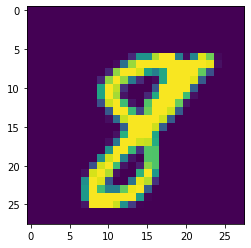

In [113]:
# Visually display the 2D vector using matplotlib imshow module. What value is displayed?
plt.imshow(x_train[55])


In [114]:
# Based on independent variable dimension, how many color channels does the dataset use?

# data set just one channels It uses

In [115]:
# Please make sure that all tasks have been answered.

## 1. Tensorflow implementation

Using the code below, answer and implement the solution to each question.

In [116]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(
        input_shape=(1, 1)
    ),
    tf.keras.layers.Dense(
        units=1,
        activation=None,
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=1,
        activation=None,
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=1,
        activation=None,
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=1,
        activation=None,
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=1,
        activation=None,
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    # Output layer (missing)
])



### Tasks
* Update model input tensor shape, with the shape of the dataset input vectors.


1.   **updated input layer with (28,28)**


* Choose and set activation function for hidden layers and explain why you chose that option, update the model with that activation function.
 

1.   *Choosed Relu because contain derivate function is perfect to calaculated weight in back prpagation process, avoid negatives number*


* Would you add bias to the layers? Explain why or why not, and add bias to all layers if you answered yes.
1.  This model dont have a lot classses to use bias 
* Update number of nodes in each layer to match the following rule:
    - First hidden layer, should be the same number of nodes as the input layer flattenized. Hint: nodes = h x w
    - Each layer should be 1/2x of the previous layer nodes (x = previous layer nodes). This exception is for the output layer that will be added in the next step.
* Add an output layer:
    - How many nodes will have the output layer based on the dataset? Specify the number of nodes in the output layer in the model.
1. We have 10 labels to classificate
    - Which activation function would you use for the output layer, explain why, and add it to the model.
1. softmax its distribution are use to classification problem and where the sum of the probabilities is 1
* Train the model using the training set
* Evaluate the model accuracy
    - What does the loss mean? What is the loss for the model?
    It represents the difference between the predicted values and the true values of the training data, and is typically expressed as a scalar value that is minimized during training.
    - What does accuracy mean? What is the accuracy of the model?
    I t represents the proportion of correctly classified instances to the total number of instances.
* Why would you add dropout layers to the model?
- Avoid overffiting 
* Add a dropout layer previous the output layer with 20% dropout, compare the 2 models loss and accuracy. Which one was better?
- first model look better I compared val_accuracy and loss value


In [117]:
# input 28,28*
# used relu because all information is 0 when data is leess 0 and get original values if x > 0 then Its a betterr function to back propagation because relu has can be derevate 
#Yes i can, but this data set is not complex



model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(
        input_shape=(28, 28)
    ),
    tf.keras.layers.Dense(
        units=784,
        activation='relu',
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=392,
        activation='relu',
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=196,
        activation='relu',
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=98,
        activation='relu',
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        units=49,
        activation=None,
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dense(
        10, activation='softmax'
    )
])




In [118]:
model_dropout = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(
        input_shape=(28, 28)
    ),
    tf.keras.layers.Dense(
        units=784,
        activation='relu',
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        units=392,
        activation='relu',
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        units=196,
        activation='relu',
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        units=98,
        activation='relu',
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        units=49,
        activation='relu',
        use_bias=False,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        10, activation='softmax'
    )
])


# 2. Model compilation

### Tasks
- Explain which loss metric would you use for this dataset where you expect to classify inputs.
- Compile the model with that loss metric.

# 3. Model evaluation

### Tasks
- Evaluate the model loss and accuracy.
- Build confussion matrix for the model that has the dropout layer, and explain the confusion matrix relevant metrics.

In [119]:
# categorical_crossentropy

#is used because categorical_crossentropy is ajusted to a lot categorical output is used to more than 2

callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [120]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_dropout.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

(10000, 10)

In [140]:
from keras.utils.np_utils import to_categorical
# Fit the model with the train set, use 10 epochs
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
model.fit(x_train, 
          y_train, 
          callbacks = [callback_early],
          epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1521 - accuracy: 0.9716 - val_loss: 0.2337 - val_accuracy: 0.9678
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1754 - accuracy: 0.9671 - val_loss: 0.3138 - val_accuracy: 0.9425
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1294 - accuracy: 0.9741 - val_loss: 0.1889 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0979 - accuracy: 0.9805 - val_loss: 0.1921 - val_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0864 - accuracy: 0.9839 - val_loss: 0.1644 - val_accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0742 - accuracy: 0.9849 - val_loss: 0.2116 - val_accuracy: 0.9687
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0564 - accuracy: 0.9887 - val_loss: 0.1768 - val_accuracy

In [141]:
model_dropout.fit(x_train, y_train, callbacks = [callback_early],epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8353 - accuracy: 0.7638 - val_loss: 0.2565 - val_accuracy: 0.9489
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4000 - accuracy: 0.9057 - val_loss: 0.2353 - val_accuracy: 0.9553
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3144 - accuracy: 0.9261 - val_loss: 0.2529 - val_accuracy: 0.9477
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2753 - accuracy: 0.9338 - val_loss: 0.1765 - val_accuracy: 0.9620
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2441 - accuracy: 0.9437 - val_loss: 0.1818 - val_accuracy: 0.9628
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2303 - accuracy: 0.9484 - val_loss: 0.1965 - val_accuracy: 0.9666
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2260 - accuracy: 0.9478 - val_loss: 0.1652 - val_accuracy

In [146]:
# Evaluate the model with verbose=2 to know loss and accuracy metrics for the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

313/313 - 1s - loss: 0.2500 - accuracy: 0.9766 - 662ms/epoch - 2ms/step
Test loss: 0.2500, Test accuracy: 0.9766


In [147]:
# Predict on the test set
y_pred = model.predict(x_test)
y_pred = tf.argmax(y_pred, axis=1)

# Build the confusion matrix
confusion_mtx = tf.math.confusion_matrix(test_labels, y_pred)

# Print the confusion matrix
print(confusion_mtx)

313/313 [==============================] - 1s 2ms/step
tf.Tensor(
[[ 974    1    1    1    0    0    1    0    0    2]
 [   1 1119    5    1    0    0    1    0    8    0]
 [   9    0 1008    0    1    0    0    6    8    0]
 [   0    1    9  978    0    6    0    5    5    6]
 [   2    2    2    0  953    0    4    7    0   12]
 [   3    0    1    6    0  849    2    1   12   18]
 [   6    3    0    0    2    7  933    0    4    3]
 [   3    1    8    0    0    0    0 1011    1    4]
 [   3    6    3    1    0    3    0    3  945   10]
 [   1    1    1    1    4    2    0    3    0  996]], shape=(10, 10), dtype=int32)


# 4. Analysis

### Tasks
- What is the category that gets classified incorrectly the most
    - what would you do to solve this issue?
* Get the first 10 elements of the dependent variable test set. Suppose these values are the only ones that we would like to classify.
    - Considering our Neural Network architecture, how many nodes would the output layer have if we train with this scenario?
    - Considering our Neural Network architecture, if we increase the input tensor shape to 45x45, how many nodes would each hidden layer have?

In [142]:
import numpy as np

# Get the confusion matrix
confusion_mtx = tf.math.confusion_matrix(test_labels, y_pred)

# Convert the tensor to a NumPy array for easier indexing
confusion_mtx = confusion_mtx.numpy()

# Compute the sum of off-diagonal elements for each row
sums = np.sum(confusion_mtx - np.diag(np.diag(confusion_mtx)), axis=1)

# Find the index of the row with the largest sum
max_idx = np.argmax(sums)

# Print the category with the largest number of misclassifications
print(f"Category {max_idx} has the largest number of misclassifications.")

Category 6 has the largest number of misclassifications.


We can collect more traine data for that category or we can use data augmentation, to expand data set


In [143]:
# We can collect more traine data for that category or we can use data augmentation, to expand data set solve categorical issue

In [144]:
first_10 = test_labels[:10]
print(set(first_10))
print(f'output layer {len(set(first_10))}')


{0, 1, 2, 4, 5, 7, 9}
output layer 7


If we increase the input tensor shape to 45x45, the number of input nodes in the first layer of our neural network would be 2025 (45 x 45).
I increased scale the number of nodes in each layer proportional to the increase in input size.


In [145]:
print(784 * (45/28)
, 784/2 * (45/28)
, 784/2/2 * (45/28)
, 784/2/2/2 * (45/28)
, 784/2/2/2/2 * (45/28)
, sep='\n')

1260.0
630.0
315.0
157.5
78.75


# Theory questions

a. Explain the difference between supervised and non-supervised algorithms.
*Supervised algorithms are trained on labeled data*
*non-supervised algorithms: are trained on ublabeled data*

b. Explain 3 non-supervised algorithms



1.   K-Means Clustering: K-Means is a clustering algorithm that groups similar data points together into a predetermined number of clusters. 
2.   Principal Component Analysis (PCA): PCA is a dimensionality reduction algorithm that reduces the number of features in a data set while retaining most of the variability in the original data,  can be used in place of the original features to perform tasks such as visualization, classification, or regression. 
3. Association Rule Mining: Association rule mining is a technique for discovering interesting relationships between variables in a large data set. The goal of this technique is to find patterns or rules that describe the co-occurrence of items in a data set



c. Explain 3 supervised algorithms
1. Linear Regression: The linear equation is learned using a training set of input-output pairs, and once the model is trained, it can be used to make predictions on new data.

2. Decision Trees: The algorithm works by recursively partitioning the input space into subsets based on the values of the input features, until a stopping criterion is met. 

3. Support Vector Machines (SVMs): I like how to build this algorthm, we can use how neurone. The algorithm works by finding the hyperplane that separates the data into different classes or predicts the output value based on the input features. 

d. When analyzing statistical significance in hypothesis testing, considering a P value of 0.15, answer the following scenarios:

    - What does it mean a p-value > 0.15?
    - What does it mean a p-value = 0.15?
    - What does it mean a p-value < 0.15?



1.   value greater than 0.15 indicates that there is not enough evidence to reject the null hypothesis at the 0.05 significance level.
2.   value equal to 0.15 means that there is a 15% chance of observing the test statistic if the null hypothesis is true.
3.   value less than 0.15 means that there is strong evidence against the null hypothesis at the 0.05 significance level.


    
e. How would you overcome overfitting when training a Neural Network?

therae are a lot way to overcome overfitting
1. I prefered use Transfer learning to avoid overfitting
2. Used Data augmetatation  to crease the size and versity of training set.
3. Use regularization techniques: Regularization methods, such as L1 or L2 regularization, dropout, or early stopping, can help prevent overfitting by adding constraints to the network's weights and biases, or by stopping the training process early.
4. Simplify the model architecture
5. Keras tunner if we cant use transfer learning


# On completion

Push this notebook to your personal repository and share the repository URL via email. Best of the luck.